In [2]:
# python seabon library
# used for data visualisation and based on matplotlib
#   seaborn allows the creation of statsistical graphs
#   Functionality:
#   1. allows comparison between multiple variables
#   2. supports multi plot grids
#   3. available univariate and bivariate visulizations
#   4. availability of different colour palettes
#   5.estimates and plots linear regression automatically

In [3]:
# seaborn VS matplotlib:
# matplotlib settings are difficult to figure out.seaborn comes with numerous customised themes and high-level interfaces
# matplotlib doesnot serve well when it comes to dealing with dataframes, while seaborn functions actually work on datframes

In [9]:
# installing seaborn
# pip install seaborn
# conda install seaborn in anaconda prompt


In [10]:
#dependency installations
# numpy , scipy, matplotlib, pandas

In [ ]:
# functions:
# 1.visualizing statistical relationships- process of understanding relation between variables of a dataset -- relplot()
# 2.plotting with categorical data- main variable is further divided into discrete groups -- catplot()
# 3.visualizing the distribution of a dataset - understanding datasets with context to being univariate or bivariate-- distplot()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
a = pd.read_csv('C:/Users/VYSHNAVI/Downloads/flights_dataset/flights.csv')
print(a)

     year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
..    ...        ...         ...
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]


In [46]:
a.nunique()

year           12
month          12
passengers    118
dtype: int64

<AxesSubplot:xlabel='year', ylabel='passengers'>

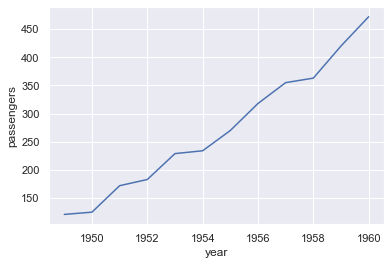

In [18]:
#To draw a line plot using long-form data, assign the x and y variables:
flights=a
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

In [22]:
# Pivot the dataframe to a wide-form representation:
flights_wide = flights.pivot( "year","month","passengers")
flights_wide.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237


<AxesSubplot:xlabel='year', ylabel='May'>

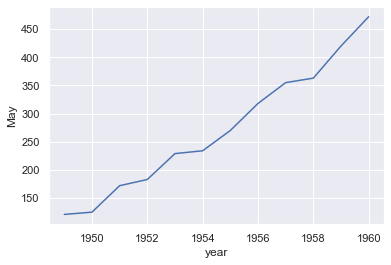

In [23]:
# To plot a single vector, pass it to data. If the vector is a pandas.Series, it will be plotted against its index:

sns.lineplot(data=flights_wide["May"])

<AxesSubplot:xlabel='year'>

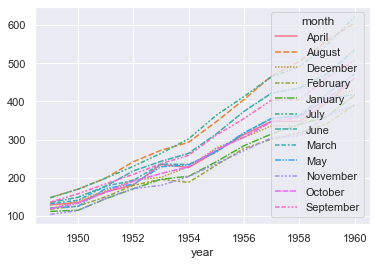

In [24]:
#Passing the entire wide-form dataset to data plots a separate line for each column:

sns.lineplot(data=flights_wide)

<AxesSubplot:xlabel='year', ylabel='passengers'>

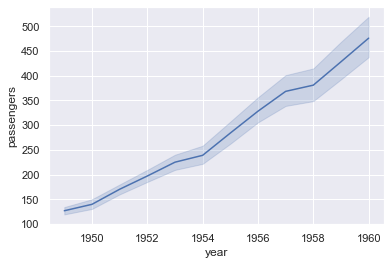

In [25]:
#Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval:

sns.lineplot(data=flights, x="year", y="passengers")

<AxesSubplot:xlabel='year', ylabel='passengers'>

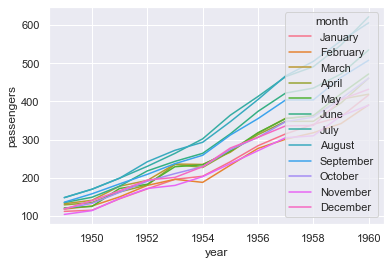

In [26]:
#Assign a grouping semantic (hue, size, or style) to plot separate lines

sns.lineplot(data=flights, x="year", y="passengers", hue="month")


<AxesSubplot:xlabel='year', ylabel='passengers'>

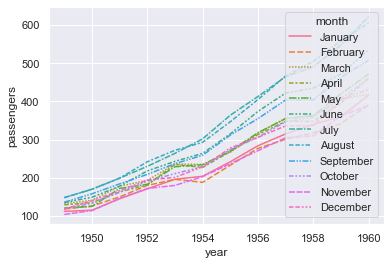

In [27]:
#The same column can be assigned to multiple semantic variables, which can increase the accessibility of the plot:
sns.lineplot(data=flights, x="year", y="passengers", hue="month", style="month")

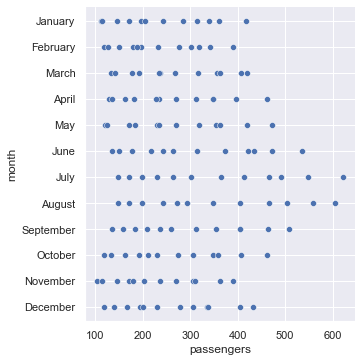

In [11]:
# relplot
sns.set_theme(style="darkgrid")
sns.relplot(x="passengers",y="month", data=a)

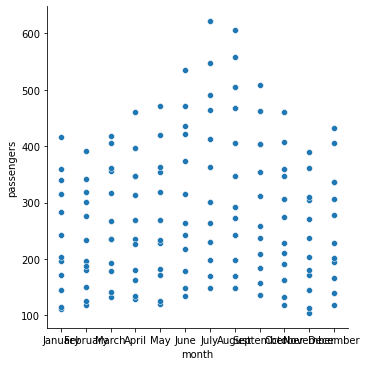

In [10]:
sns.relplot(y="passengers",x="month", data=a)

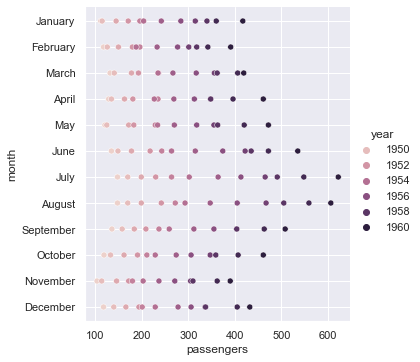

In [13]:
# to add 3 rd dimension we use hue
sns.relplot(x="passengers",y="month",hue="year", data=a)


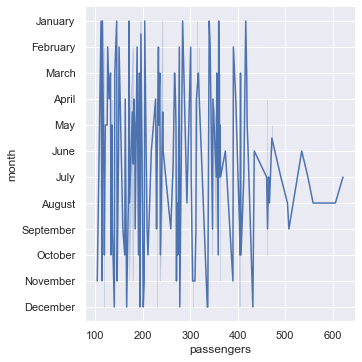

In [14]:
# to get line graph instead of scatter plot

sns.relplot(x="passengers",y="month",kind="line", data=a) # for thid data set scatter plot is better

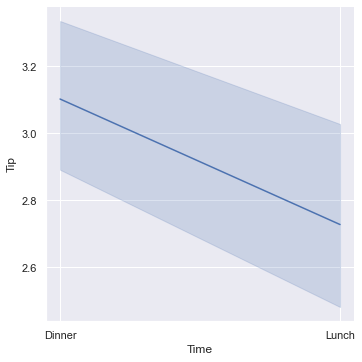

In [16]:
b=pd.read_csv('C:/Users/VYSHNAVI/Downloads/tips_dataset/tips.csv')
sns.relplot(x="Time",y="Tip",kind="line",data=b)

In [31]:
# no need to download this data set it is a standard data set in this module
fmri = sns.load_dataset("fmri")
fmri.head()


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [32]:
fmri.tail()

,subject,timepoint,event,region,signal
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
1063,s0,0,cue,parietal,-0.006899


In [45]:
fmri.nunique()

subject        14
timepoint      19
event           2
region          2
signal       1064
dtype: int64

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

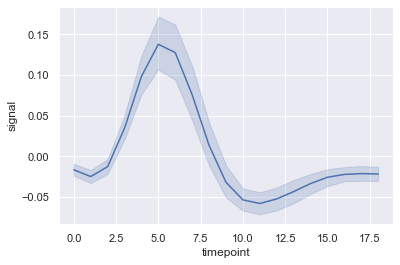

In [33]:
sns.lineplot(data=fmri, x="timepoint", y="signal")

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

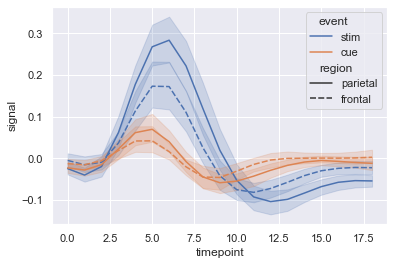

In [35]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event",style="region")

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

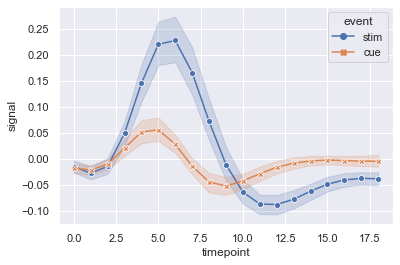

In [39]:
#When assigning a style variable, markers can be used instead of (or along with) dashes to distinguish the groups:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event",style="event",
    markers=True, dashes=False
)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

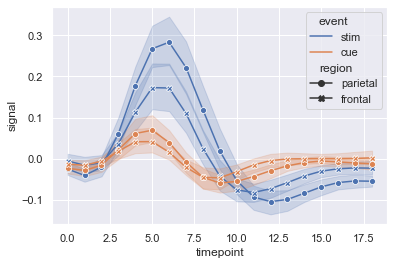

In [40]:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event",style="region",
    markers=True, dashes=False
)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

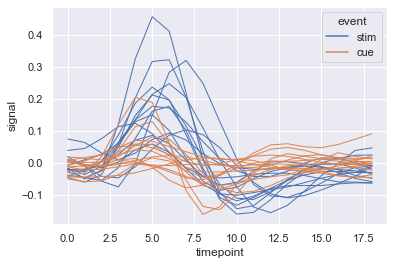

In [41]:
#Assigning the units variable will plot multiple lines without applying a semantic mapping:

sns.lineplot(
    data=fmri.query("region == 'frontal'"),
    x="timepoint", y="signal", hue="event", units="subject",
    estimator=None, lw=1,
)

In [42]:
#Load another dataset with a numeric grouping variable:

dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [43]:
dots.tail()


,align,choice,time,coherence,firing_rate
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121
393,dots,T2,720,3.2,41.716057


In [48]:
dots.nunique()

align            1
choice           2
time            41
coherence        6
firing_rate    391
dtype: int64

<AxesSubplot:xlabel='time', ylabel='firing_rate'>

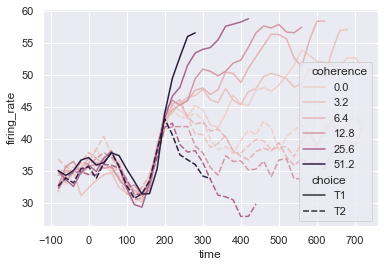

In [47]:
#Assigning a numeric variable to hue maps it differently, using a different default palette and a quantitative color mapping
sns.lineplot(
    data=dots, x="time", y="firing_rate", hue="coherence", style="choice",
)

<AxesSubplot:xlabel='time', ylabel='firing_rate'>

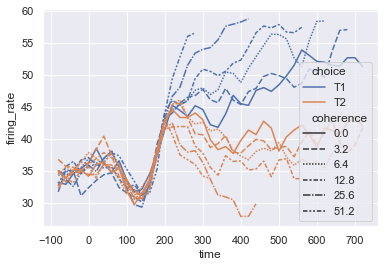

In [49]:
sns.lineplot(
    data=dots, x="time", y="firing_rate", hue="choice", style="coherence"
) # for styling if we have many values it will be difficult so its better to give 3 rd high number of varied values to hue

<AxesSubplot:xlabel='time', ylabel='firing_rate'>

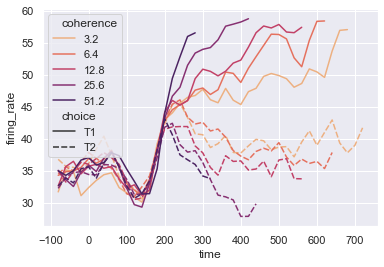

In [51]:
#Control the color mapping by setting the palette and passing a matplotlib.colors.Normalize object:
import matplotlib as mpl
sns.lineplot(
    data=dots.query("coherence > 0"),
    x="time", y="firing_rate", hue="coherence", style="choice",
     palette="flare", hue_norm=mpl.colors.LogNorm(),
)

<AxesSubplot:xlabel='time', ylabel='firing_rate'>

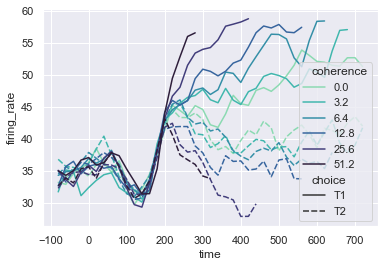

In [52]:
#Or pass specific colors, either as a Python list or dictionary:

palette = sns.color_palette("mako_r", 6)
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    hue="coherence", style="choice",
    palette=palette
)

<AxesSubplot:xlabel='time', ylabel='firing_rate'>

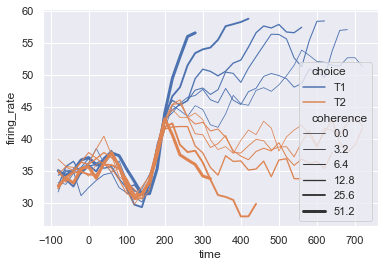

In [53]:
#Assign the size semantic to map the width of the lines with a numeric variable:
sns.lineplot(
    data=dots, x="time", y="firing_rate",
    size="coherence", hue="choice",
    legend="full"
)

<AxesSubplot:xlabel='time', ylabel='firing_rate'>

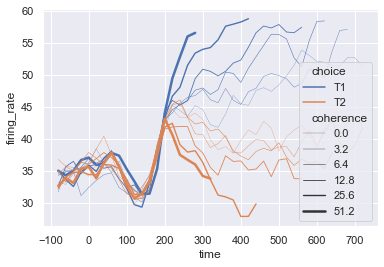

In [54]:
#Pass a a tuple, sizes=(smallest, largest), to control the range of linewidths used to map the size semantic:

sns.lineplot(
    data=dots, x="time", y="firing_rate",
    size="coherence", hue="choice",
    sizes=(.25, 2.5)
)

In [57]:
#catplot -- estimated plots, scatter ,distribution # scatterplo is default one

tips=sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

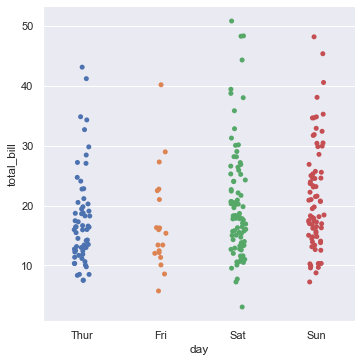

In [59]:
sns.catplot(x="day", y="total_bill", data=tips)

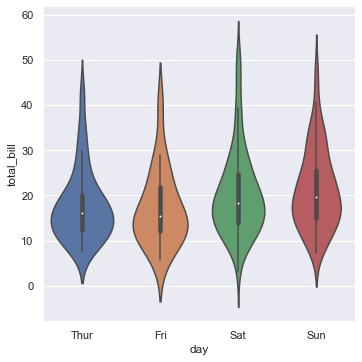

In [60]:
sns.catplot(x="day", y="total_bill", data=tips, kind="violin")

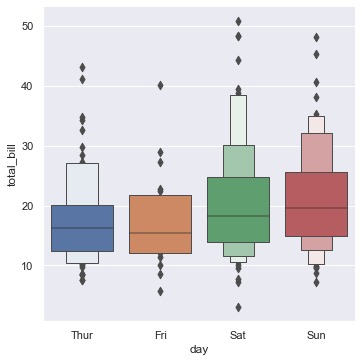

In [61]:
sns.catplot(x="day", y="total_bill", data=tips, kind="boxen")

In [62]:
# univariate and bivariate distribution
from scipy import stats

In [68]:
c=np.random.normal(loc=5, size=100, scale=2)
# np.random.normal(loc=,scale=,size=(m,n))
# produces a array of mxn size with random data whose mean=loc and standard deviation=scale


C:\Users\VYSHNAVI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

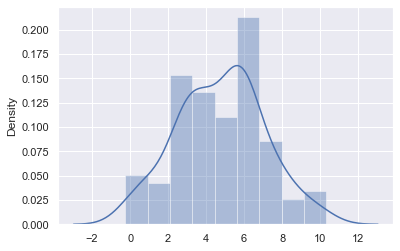

In [71]:
sns.distplot(c)

In [72]:
# multi-plot grids--graphs are plotted side-by-side using the same scale and axes to aid comparison
# we can use facet grid or pair grid function

In [73]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [75]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

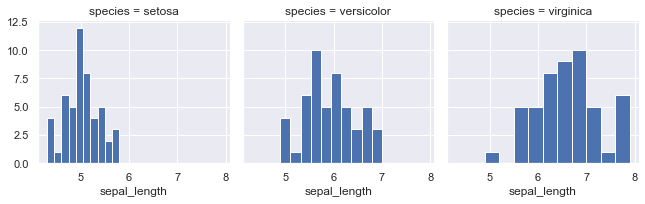

In [76]:
b=sns.FacetGrid(iris,col="species")
b.map(plt.hist, "sepal_length")

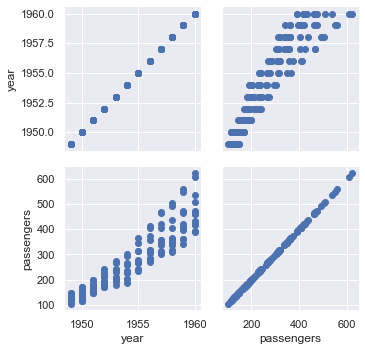

In [77]:
# pair grid
a=sns.load_dataset("flights")
b=sns.PairGrid(a)
b.map(plt.scatter)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

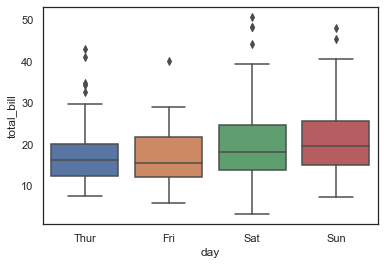

In [81]:
# plot-asthenics -styling graphs
sns.set(style="white", color_codes=True)
a=sns.load_dataset("tips")
sns.boxplot(x="day",y="total_bill",data=a)


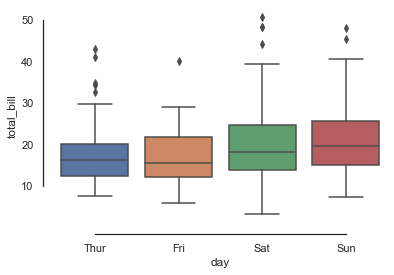

In [82]:
# to remove axes use despine function
sns.set(style="white", color_codes=True)
a=sns.load_dataset("tips")
sns.boxplot(x="day",y="total_bill",data=a)
sns.despine(offset=10, trim=True)

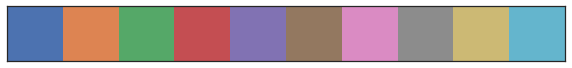

In [86]:
# to check available color pallets in seaborn
c=sns.color_palette()
sns.palplot(c)

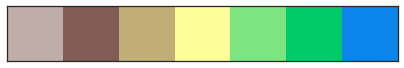

In [87]:
current_palette = sns.color_palette()
sns.palplot(sns.color_palette("terrain_r", 7))
plt.show()

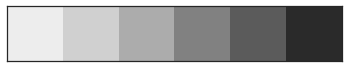

In [88]:
current_palette = sns.color_palette()
sns.palplot(sns.color_palette("Greys"))
plt.show()